# Пример 1.1.1.


Пусть дана начальная популяция из четырех хромосом с двумя
генами x и y. Показатель качества хромосомы оценивается функцией Z.
При равном качестве хромосом предпочтение отдается хромосоме с
большим номером. На каждом этапе хромосома a с высшим качеством
порождает четыре новых хромосомы 𝑏1, 𝑐1, 𝑏2, 𝑐2, обмениваясь генами с
двумя хромосомами b и c более низкого качества по указанной схеме:
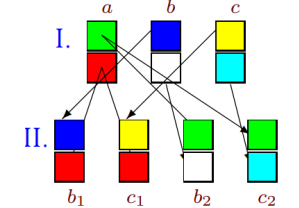

Последняя хромоcома (с низшим качеством) выбывает из
популяции. Найти максимальный показатель качества хромосомы в
популяции и общее качество популяции после четырех этапов эволюции.

In [2]:
# функция качества хромосомы
def qZ(x, y):
    return (x - 3*y + 1) / (3* x ** 2 + 3 * y ** 2 + 1)

# сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

# схема обмена хромосомами
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]

    return X, Y

# сортировка массива качества наших потомков и выделение полученных индексов
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId

# шаг эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
  
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

# шаги эволюции (конечная функция)
def evoSteps(X, Y, stepsNum = 4):
    results = []

    for i in range(stepsNum):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results


# обьявление массивов хромосом (исходных данных)
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

# реализация алгоритма
results = evoSteps(X, Y)

# вывод результатов
for i in range(len(results[2])):
    print(f'max_{i+1} step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z:  {max(qualityArrZ)}')

max_1 step: 1.4857142857142858
max_2 step: 1.4615384615384615
max_3 step: 2.967032967032967
max_4 step: 3.5384615384615383
max Z:  1.0


# Задание

Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными.

In [3]:
# Вариант №4

def qZ(x, y):
    return (x + 3*y) / (3*x**2 + y**2 + 1)

def qSumZ(Z):
    return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]   
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    X[0] = oldX[sortedId[0]]
    X[1] = oldX[sortedId[1]]
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]
    return X, Y

def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId

def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X, Y, Z

def evoSteps(X, Y, stepsNum = 4):
    results = []
    for i in range(stepsNum):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])
    return X, Y, results

X = [-1, 0, 2, 4]
Y = [-2, 1, -1, 0]

results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')  

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]   

print(f'max Z:      {max(qualityArrZ)}')

max_1_step: 0.6352040816326531
max_2_step: -1.002857142857143
max_3_step: 2.150989010989011
max_4_step: 2.2142857142857144
max Z:      1.5


# Пример 1.2.1.

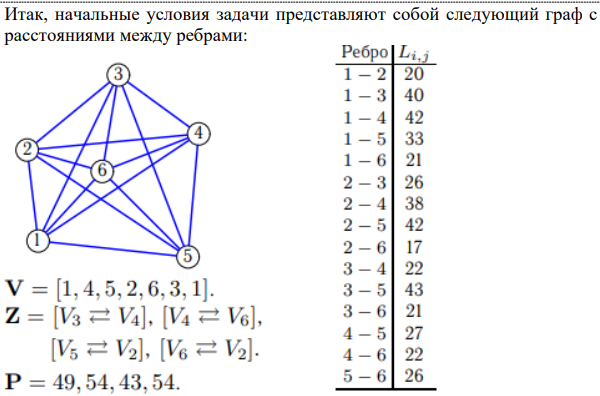

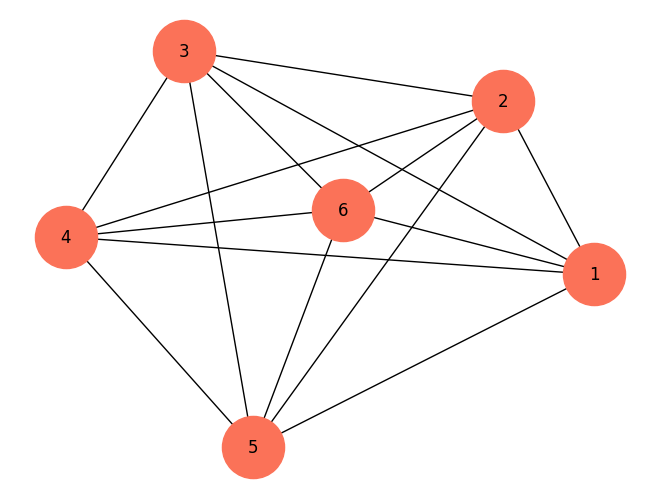

In [28]:
import networkx as nx
from math import e

distances = [(1, 2, 20),
             (1, 3, 40),
             (1, 4, 42),
             (1, 5, 33),
             (1, 6, 21),
             (2, 3, 26),
             (2, 4, 38),
             (2, 5, 42),
             (2, 6, 17),
             (3, 4, 22),
             (3, 5, 43),
             (3, 6, 21),
             (4, 5, 27),
             (4, 6, 22),
             (5, 6, 26)] # длины ребер

V = [1, 4, 5, 2, 6, 3, 1]  # последовательность прохождения маршрута

Z = [(3, 4), (4, 6), (5, 2), (6, 2)]  # последовательность замен вершин

P = [49, 54, 43, 54]  # случайные числа, выпавшие в процессе счёта

T = 100  # начальная температура


# функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)

# функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

# построим граф по заданным вершинам
graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size=2000, with_labels=True)

In [39]:
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

# вычисление длины маршрута
def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))

    return sum(edges)

# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

# перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)

        deltaS = newS - sumLength
        if deltaS > 0:
            p = probability(deltaS, T)

            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
    
    T = reductTemp(T)

    return V, arrSum


In [40]:
# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []

    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:newDistances.append(distance)
  
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 5, 2, 3, 4, 6, 1]
Длина всго лучшего выбранного маршрута: 166
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


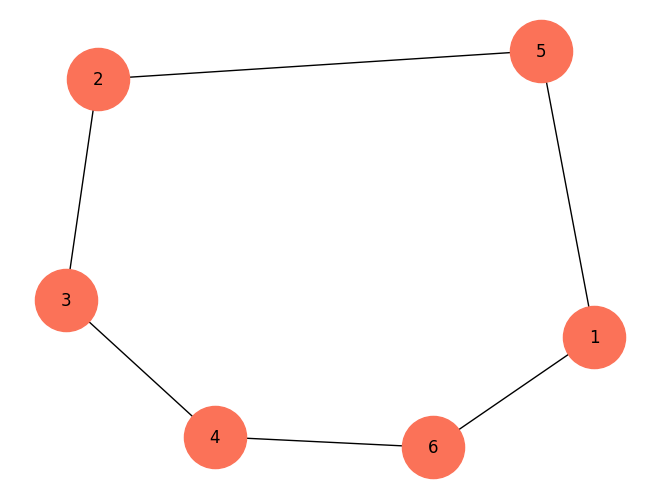

In [41]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина всго лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)

# Задание

Найти длину гамильтонова цикла S4 в полном графе K6 после четырех 
циклов решения задачи методом отжига по вариантам ниже.

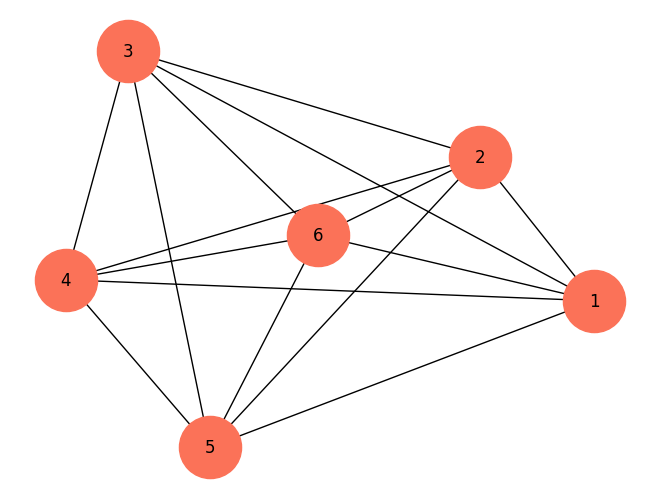

In [42]:
# Вариант №4

import networkx as nx
from math import e
distances = [(1, 2, 17),
            (1, 3, 39),
            (1, 4, 32),
            (1, 5, 28),
            (1, 6, 18),
            (2, 3, 24),
            (2, 4, 28),
            (2, 5, 35),
            (2, 6, 13),
            (3, 4, 25),
            (3, 5, 43),
            (3, 6, 23),
            (4, 5, 20),
            (4, 6, 16),
            (5, 6, 24)]
V = [1, 5, 2, 6, 3, 4, 1]
Z = [(3, 4),
     (4, 5),
     (5, 2),
     (6, 2)]
P = [78, 79, 25, 82]
T = 100
def probability(delta, T):
    return 100 * e ** (-delta / T)
def reductTemp(prevT):
    nextT = 0.5 * prevT    
    return nextT
graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 3, 6, 2, 5, 4, 1]
Длина лучшего выбранного маршрута: 162
Длины всех рассмотренных маршрутов: [156, 146, 159, 162, 178]


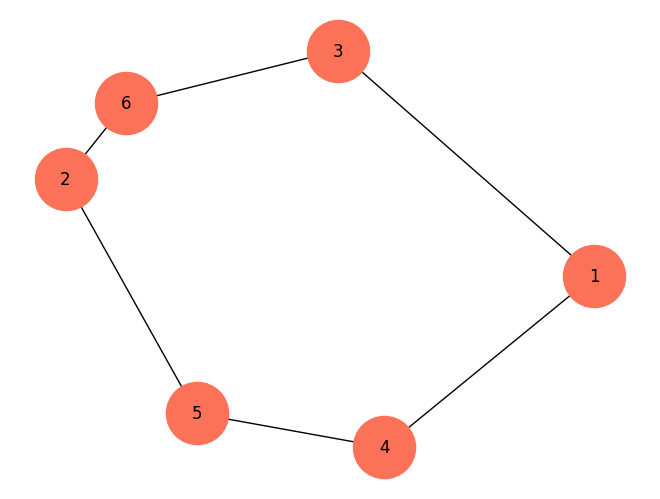

In [43]:
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reductTemp(T)
    return V, arrSum
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i +1]:
                newDistances.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)